In [1]:
import numpy as np
import pandas as pd
import torch
from gcn_model import GCNModel
import utilities
from test_model import test_model
import os
import seaborn as sns
import matplotlib.pyplot as plt

/home/users/lewinsda/.conda/envs/daniel_thesis_2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
grid_results = pd.read_csv("grid_search_0.7_output/combined.csv", header=None, index_col=0)
grid_results.columns = ["Total Accuracy", "Train Accuracy", "Test Accuracy", "Total SD", "Train SD", "Test SD", "Config", "Dropout", "Batch", "Neighbors"]

In [11]:
# add layer and embedding columns
#grid_results['Config'].apply(str.split("_"))
grid_results['GCN Layers'] = grid_results['Config'].apply(lambda x: x.split('_')[0])
grid_results['Final Embedding'] = grid_results['Config'].apply(lambda x: x.split('_')[1].split(".")[0])

In [12]:
grid_results.sort_values("Test Accuracy", ascending=False).head(50)

,Total Accuracy,Train Accuracy,Test Accuracy,Total SD,Train SD,Test SD,Config,Dropout,Batch,Neighbors,GCN Layers,Final Embedding
0,,,,,,,,,,,,
37,0.961662,0.972497,0.852222,0.001161,0.000000,0.012883,2_25.txt,0.0,20,2,2,25
361,0.961361,0.972497,0.848889,0.002121,0.000000,0.023541,2_60.txt,0.0,20,2,2,60
365,0.961161,0.972497,0.846667,0.002619,0.000000,0.029069,2_60.txt,0.0,35,2,2,60
109,0.960460,0.972497,0.838889,0.003983,0.000000,0.044212,2_8.txt,0.0,20,2,2,8
253,0.960460,0.972497,0.838889,0.005344,0.000000,0.059317,2_40.txt,0.0,20,2,2,40
41,0.960460,0.972497,0.838889,0.002016,0.000000,0.022376,2_25.txt,0.0,35,2,2,25
257,0.959860,0.972497,0.832222,0.001914,0.000000,0.021244,2_40.txt,0.0,35,2,2,40
268,0.959660,0.972497,0.830000,0.002671,0.000000,0.029653,2_40.txt,0.0,65,2,2,40
329,0.959359,0.972497,0.826667,0.003781,0.000000,0.041968,2_15.txt,0.0,35,2,2,15


<AxesSubplot:xlabel='Dropout', ylabel='Test Accuracy'>

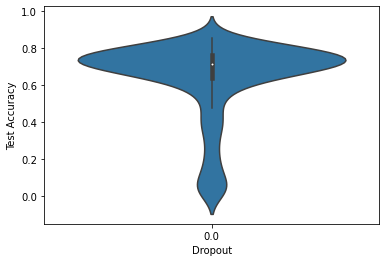

In [5]:
sns.violinplot(x=grid_results["Dropout"], y=grid_results["Test Accuracy"])

<AxesSubplot:xlabel='Final Embedding', ylabel='Test Accuracy'>

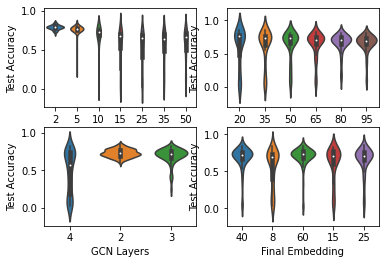

In [6]:
grid_results = grid_results[grid_results['Dropout'] == 0.0]
# call regplot on each axes
#fig, (ax1, ax2, ax3, ax4) = plt.subplots(2,2)
fig, axs = plt.subplots(2,2)
sns.violinplot(x=grid_results["Neighbors"], y=grid_results["Test Accuracy"], ax = axs[0][0])
sns.violinplot(x=grid_results["Batch"], y=grid_results["Test Accuracy"], ax = axs[0][1])
sns.violinplot(x=grid_results["GCN Layers"], y=grid_results["Test Accuracy"], ax = axs[1][0])
sns.violinplot(x=grid_results["Final Embedding"], y=grid_results["Test Accuracy"], ax = axs[1][1])